<a href="https://colab.research.google.com/github/ItsRajSingh/ComputerVisionLearning/blob/main/Object_Detection_and_Segmentation_using_Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import Image

In [2]:
!pip install ultralytics==8.0.0


In [3]:
pip install -U ultralytics

  Using cached ultralytics-8.3.94-py3-none-any.whl.metadata (35 kB)
Using cached ultralytics-8.3.94-py3-none-any.whl (949 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.0
    Uninstalling ultralytics-8.0.0:
      Successfully uninstalled ultralytics-8.0.0


In [5]:
import torch
import os

# Override the default torch.load function to use weights_only=False
original_torch_load = torch.load

def patched_torch_load(*args, **kwargs):
    kwargs['weights_only'] = False
    return original_torch_load(*args, **kwargs)

torch.load = patched_torch_load

# Now load your model
from ultralytics import YOLO
model = YOLO('yolov8s.pt')

# Run inference on your image
results = model.predict(source='/content/5124775166_09e5a7c978_b.jpg', save=True)


image 1/1 /content/5124775166_09e5a7c978_b.jpg: 512x640 18 cars, 1 truck, 589.8ms
Speed: 6.5ms preprocess, 589.8ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict3


In [6]:
torch.cuda.is_available()

False

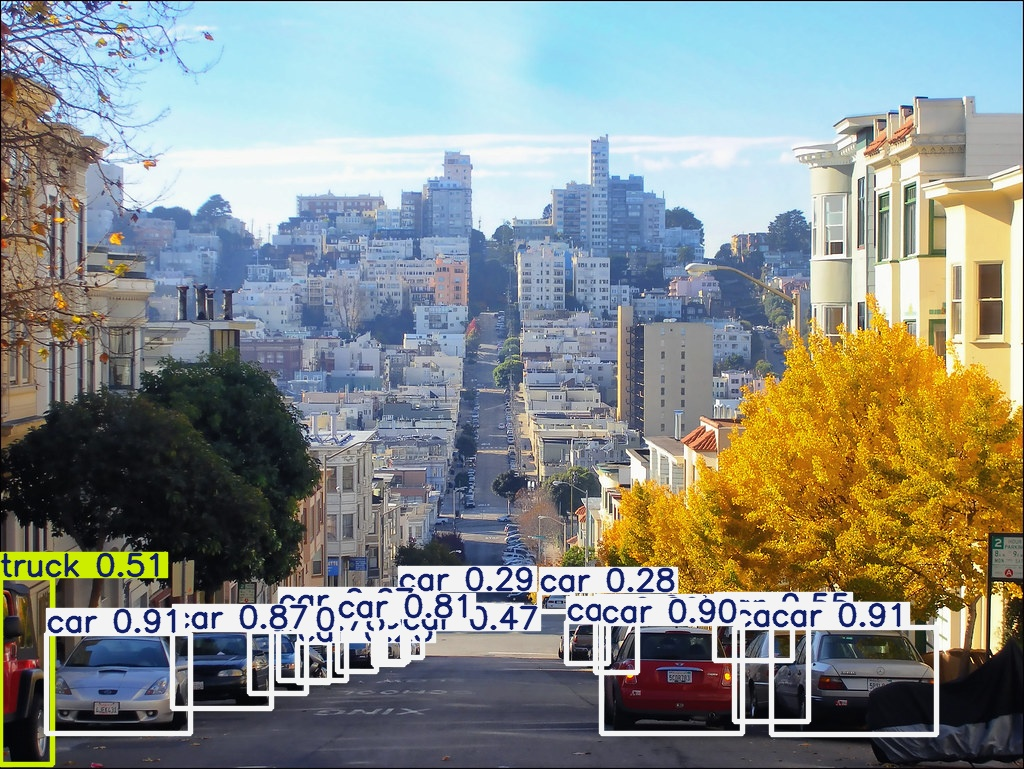

In [8]:
Image("/content/runs/detect/predict2/5124775166_09e5a7c978_b.jpg")

In [8]:
results = model.predict(source='/content/5124775166_09e5a7c978_b.jpg', save=True, save_txt = True)


image 1/1 /content/5124775166_09e5a7c978_b.jpg: 512x640 18 cars, 1 truck, 691.4ms
Speed: 6.1ms preprocess, 691.4ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


In [9]:
results = model.predict(source='/content/5124775166_09e5a7c978_b.jpg', save=True, save_txt = True , save_crop = True)


image 1/1 /content/5124775166_09e5a7c978_b.jpg: 512x640 18 cars, 1 truck, 543.0ms
Speed: 3.9ms preprocess, 543.0ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


In [11]:
results = model.predict(source = "/content/135909-764370877_small.mp4", save = True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/271) /content/135909-764370877_small.mp4: 384x640 8 persons, 9 cars, 7 motorcycles, 459.3ms
video 1/1 (frame 2/271) /content/135909-764370877_small.mp4: 384x640 7 persons, 7 cars, 7 motorcycles, 1 truck, 447.7ms
video 1/1 (frame 3/271) /content/135909-764370877_small.mp4: 384x640 11 persons, 8 cars, 8 motorcycles, 422.4ms
video 1/1 (frame 4/271) /content/135909-764370877_small.mp4: 384x640 10 persons, 7 cars, 7 motorcycles, 458.8ms
v

In [12]:
#Image Segmentation

In [6]:
model = YOLO('yolov8s-seg.pt')  # or yolov8m-seg.pt, yolov8l-seg.pt

# Perform segmentation on an image
results = model.predict(
    source='/content/5124775166_09e5a7c978_b.jpg',
    save=True,                  # Save the output
    project='/content/Seg',  # Custom output folder
    name='segmentation_results' # Custom name
)


100%|██████████| 22.8M/22.8M [00:00<00:00, 115MB/s] 



image 1/1 /content/5124775166_09e5a7c978_b.jpg: 512x640 1 person, 19 cars, 1 truck, 982.1ms
Speed: 3.5ms preprocess, 982.1ms inference, 127.1ms postprocess per image at shape (1, 3, 512, 640)
Results saved to /content/Seg/segmentation_results


AttributeError: 'list' object has no attribute 'save_dir'

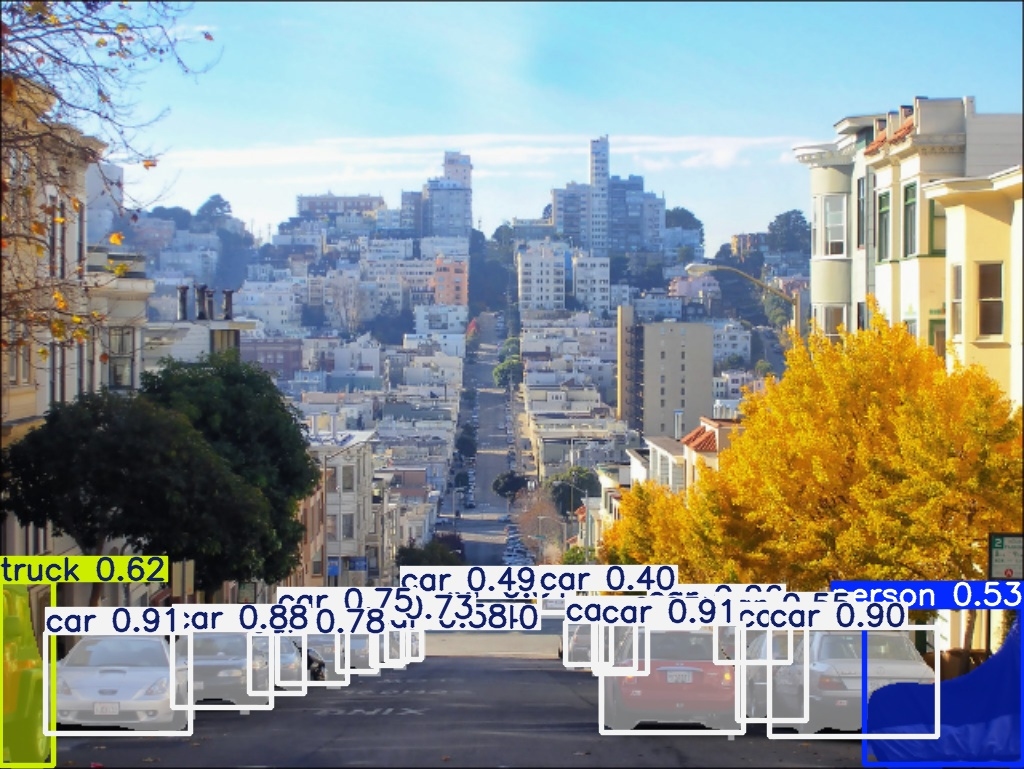

In [7]:
Image("/content/Seg/segmentation_results/5124775166_09e5a7c978_b.jpg")

In [8]:
!yolo task=segment mode=export model=yolov8s-seg.pt format=onnx

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8s-seg summary (fused): 85 layers, 11,810,560 parameters, 0 gradients, 42.6 GFLOPs

PyTorch: starting from 'yolov8s-seg.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 116, 8400), (1, 32, 160, 160)) (22.8 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 176.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 164.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 129.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 155.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 110.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.6s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for upda